# Entrenamiento del modelo

### Librerias 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Cragar los datos limpios 

In [6]:
df = pd.read_csv('../data/1_final/clean_datasetn.csv')

#### Codificar variables categóricas y modelos de escogidos 

In [ ]:
X = df.drop(columns=['condition']) 
y = df['condition']                

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=42)

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train_imputed)
X_test_scaled_numeric = scaler.transform(X_test_imputed)

X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_numeric, columns=X_test_numeric.columns, index=X_test.index)

X_train_scaled = X_train_scaled.join(X_train.drop(columns=X_train_numeric.columns))
X_test_scaled = X_test_scaled.join(X_test.drop(columns=X_test_numeric.columns))

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

### Entrenar los Modelos

#### Regresion Logistica

In [9]:
modelo_lr = modelos["Logistic Regression"]
modelo_lr.fit(X_train_scaled, y_train)

y_pred_lr = modelo_lr.predict(X_test_scaled)

#### Decision Tree

In [10]:
modelo_dt = modelos["Decision Tree"]
modelo_dt.fit(X_train_scaled, y_train)

y_pred_dt = modelo_dt.predict(X_test_scaled)

#### Radom Forest

In [11]:
modelo_rf = modelos["Random Forest"]
modelo_rf.fit(X_train_scaled, y_train)

y_pred_rf = modelo_rf.predict(X_test_scaled)

#### Naive Bayes

In [12]:
modelo_nb = modelos["Naive Bayes"]
modelo_nb.fit(X_train_scaled, y_train)

y_pred_nb = modelo_nb.predict(X_test_scaled)

#### XGBoost

In [13]:
modelo_xgb = modelos["XGBoost"]
modelo_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = modelo_xgb.predict(X_test_scaled)

c:\Users\ASUS\OneDrive - Universidad Autonoma de Occidente\universidad\Quinto Semesre\ETL\corte 3\Exercise_ML\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Metricas 

In [15]:
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Logistic Regression
Accuracy: 0.8513
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     16127
           1       0.86      0.81      0.84     13873

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000

🔹 Decision Tree
Accuracy: 0.8420333333333333
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     16127
           1       0.82      0.84      0.83     13873

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000

🔹 Naive Bayes
Accuracy: 0.6421666666666667
              precision    recall  f1-score   support

           0       0.89      0.38      0.53     16127
           1       0.57      0.95      0.71     13873

    accuracy                           0.64     30000
 

| Modelo                  | Accuracy | Precision   | Recall      | F1-score    | Comentario principal                                                        |
|-------------------------|----------|-------------|-------------|-------------|-----------------------------------------------------------------------------|
| **Random Forest**       | 0.8635   | 0.87 / 0.85 | 0.87 / 0.85 | 0.87 / 0.85 | Mejor rendimiento general. Robusto, preciso y bien balanceado.       |
| **XGBoost**             | 0.8518   | 0.87 / 0.84 | 0.86 / 0.85 | 0.86 / 0.84 | Excelente rendimiento. Ideal si se desea un modelo optimizable y eficiente. |
| **Logistic Regression** | 0.8513   | 0.85 / 0.86 | 0.88 / 0.81 | 0.86 / 0.84 | Muy buen desempeño para un modelo simple. Bien balanceado.                  |
| **Decision Tree**       | 0.8420   | 0.86 / 0.82 | 0.84 / 0.84 | 0.85 / 0.83 | Fácil de interpretar, pero algo menos preciso. Puede sobreajustarse.        |
| **Naive Bayes**         | 0.6422   | 0.89 / 0.57 | 0.38 / 0.95 | 0.53 / 0.71 | Bajo rendimiento general. Sesgo alto hacia una clase. No recomendado.    |

Random Forest fue seleccionado como modelo final debido a su excelente rendimiento en todas las métricas, mostrando un equilibrio sólido entre precisión y recall en ambas clases, así como la mayor exactitud general. Su capacidad para manejar datos complejos y su robustez frente al sobreajuste lo convierten en la mejor opción para este problema.

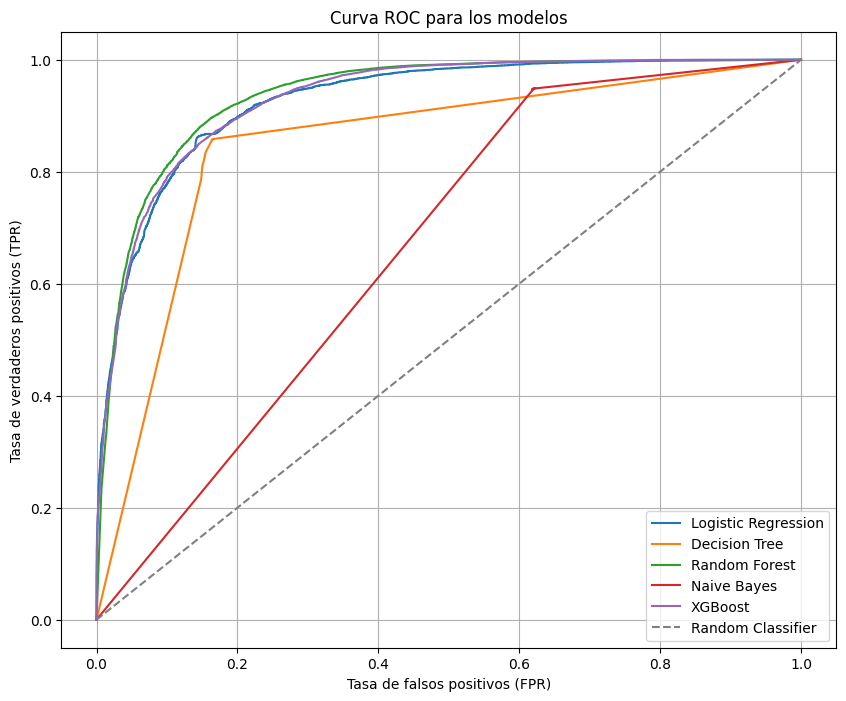

In [31]:
plt.figure(figsize=(10, 8))

for nombre, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f'{nombre}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.title('Curva ROC para los modelos')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

La curva ROC muestra gráficamente qué tan bien un modelo de clasificación distingue entre clases. Cuanto más se aleje la curva de la línea punteada (clasificador aleatorio) y más se acerque a la esquina superior izquierda, mejor es el modelo. En esta gráfica, Random Forest (verde) y XGBoost (púrpura) tienen las mejores curvas, lo que indica que son los modelos con mejor rendimiento, como también lo reflejan sus métricas (accuracy de 0.8635 para Random Forest y 0.8518 para XGBoost). Por otro lado, Naive Bayes (rojo) tiene la curva más cercana a la línea punteada, lo que confirma su bajo rendimiento (accuracy de 0.6422).

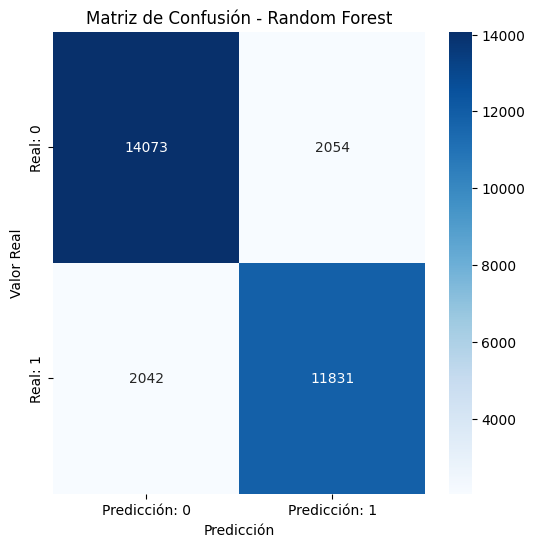

In [29]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicción: 0", "Predicción: 1"], yticklabels=["Real: 0", "Real: 1"])
plt.title("Matriz de Confusión - Random Forest")
plt.ylabel("Valor Real")
plt.xlabel("Predicción")
plt.show()



La matriz de confusión nos muestra que los falsos positivos son 2,054, lo que indica que el modelo Random Forest clasificó incorrectamente 2,054 instancias como clase 1 (positivo) cuando en realidad eran clase 0 (negativo). Además, los falsos negativos son 2,042, lo que significa que el modelo no identificó 2,042 instancias de la clase 1. A pesar de estos errores, el modelo tiene un buen rendimiento general con un accuracy de 0.8635, como se refleja en las métricas reportadas.

#### Guardar el Modelo

In [ ]:
model_dir = "../model"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

joblib.dump(modelo_rf, os.path.join(model_dir, 'random_forest_latest.pkl'))
print("Modelo guardado como: modelos/random_forest_latest.pkl")

Modelo guardado como: modelos/random_forest_latest.pkl
